# Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
sys.path.append('./lib')

In [3]:
from lib.definitions import RANDOM_SEED

In [4]:
import random
random.seed(RANDOM_SEED)

import numpy.random
numpy.random.seed(RANDOM_SEED)

import os
os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

import tensorflow
tensorflow.set_random_seed(RANDOM_SEED)

In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [6]:
from lib.definitions import RAW_TRAINING_DATA
assert RAW_TRAINING_DATA.exists()

## 1. Load Data

In [7]:
# https://www.researchgate.net/figure/Description-of-the-Statlog-Heart-data-set_tbl7_319464601
# -- 1. age
# -- 2. sex
# -- 3. chest pain type (4 values)
# -- 4. resting blood pressure
# -- 5. serum cholestoral in mg/dl
# -- 6. fasting blood sugar > 120 mg/dl
# -- 7. resting electrocardiographic results (values 0,1,2)
# -- 8. maximum heart rate achieved
# -- 9. exercise induced angina
# -- 10. oldpeak = ST depression induced by exercise relative to rest
# -- 11. the slope of the peak exercise ST segment
# -- 12. number of major vessels (0-3) colored by flourosopy
# -- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

In [8]:
from lib.definitions import column_definitions, numerical_column_names, categorical_column_names, binary_column_names

In [9]:
df_train = pd.read_csv(RAW_TRAINING_DATA, sep=' ', names=column_definitions)

In [10]:
df_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol_mg_per_dl,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak_eq_st_depression,slope_of_peak_exercise_st_segment,num_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


## 2. Statistical Summary

#### No Heart Disease

In [11]:
df_train[df_train['heart_disease']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,150.0,52.706667,9.509830,29.0,45.00,52.0,59.000,76.0
sex,150.0,0.553333,0.498813,0.0,0.00,1.0,1.000,1.0
chest_pain_type,150.0,2.820000,0.927362,1.0,2.00,3.0,3.750,4.0
resting_blood_pressure,150.0,128.866667,16.457660,94.0,120.00,130.0,140.000,180.0
serum_cholesterol_mg_per_dl,150.0,244.213333,54.019085,126.0,209.00,236.0,268.750,564.0
fasting_blood_sugar_gt_120_mg_per_dl,150.0,0.153333,0.361516,0.0,0.00,0.0,0.000,1.0
resting_ekg_results,150.0,0.860000,0.990085,0.0,0.00,0.0,2.000,2.0
max_heart_rate_achieved,150.0,158.333333,19.283357,96.0,148.25,161.0,172.000,202.0
exercise_induced_angina,150.0,0.153333,0.361516,0.0,0.00,0.0,0.000,1.0
oldpeak_eq_st_depression,150.0,0.622667,0.800851,0.0,0.00,0.2,1.175,4.2


#### Heart Disease Present

In [12]:
df_train[df_train['heart_disease']==2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,120.0,56.591667,8.116273,35.0,52.00,58.0,62.000,77.0
sex,120.0,0.833333,0.374241,0.0,1.00,1.0,1.000,1.0
chest_pain_type,120.0,3.616667,0.779823,1.0,4.00,4.0,4.000,4.0
resting_blood_pressure,120.0,134.441667,19.095424,100.0,120.00,130.0,145.000,200.0
serum_cholesterol_mg_per_dl,120.0,256.466667,47.969166,149.0,227.25,255.5,286.500,409.0
fasting_blood_sugar_gt_120_mg_per_dl,120.0,0.141667,0.350170,0.0,0.00,0.0,0.000,1.0
resting_ekg_results,120.0,1.225000,0.974140,0.0,0.00,2.0,2.000,2.0
max_heart_rate_achieved,120.0,138.858333,23.130719,71.0,124.75,141.5,157.250,195.0
exercise_induced_angina,120.0,0.550000,0.499580,0.0,0.00,1.0,1.000,1.0
oldpeak_eq_st_depression,120.0,1.584167,1.282067,0.0,0.60,1.4,2.425,6.2


## 3. Correlation Plot

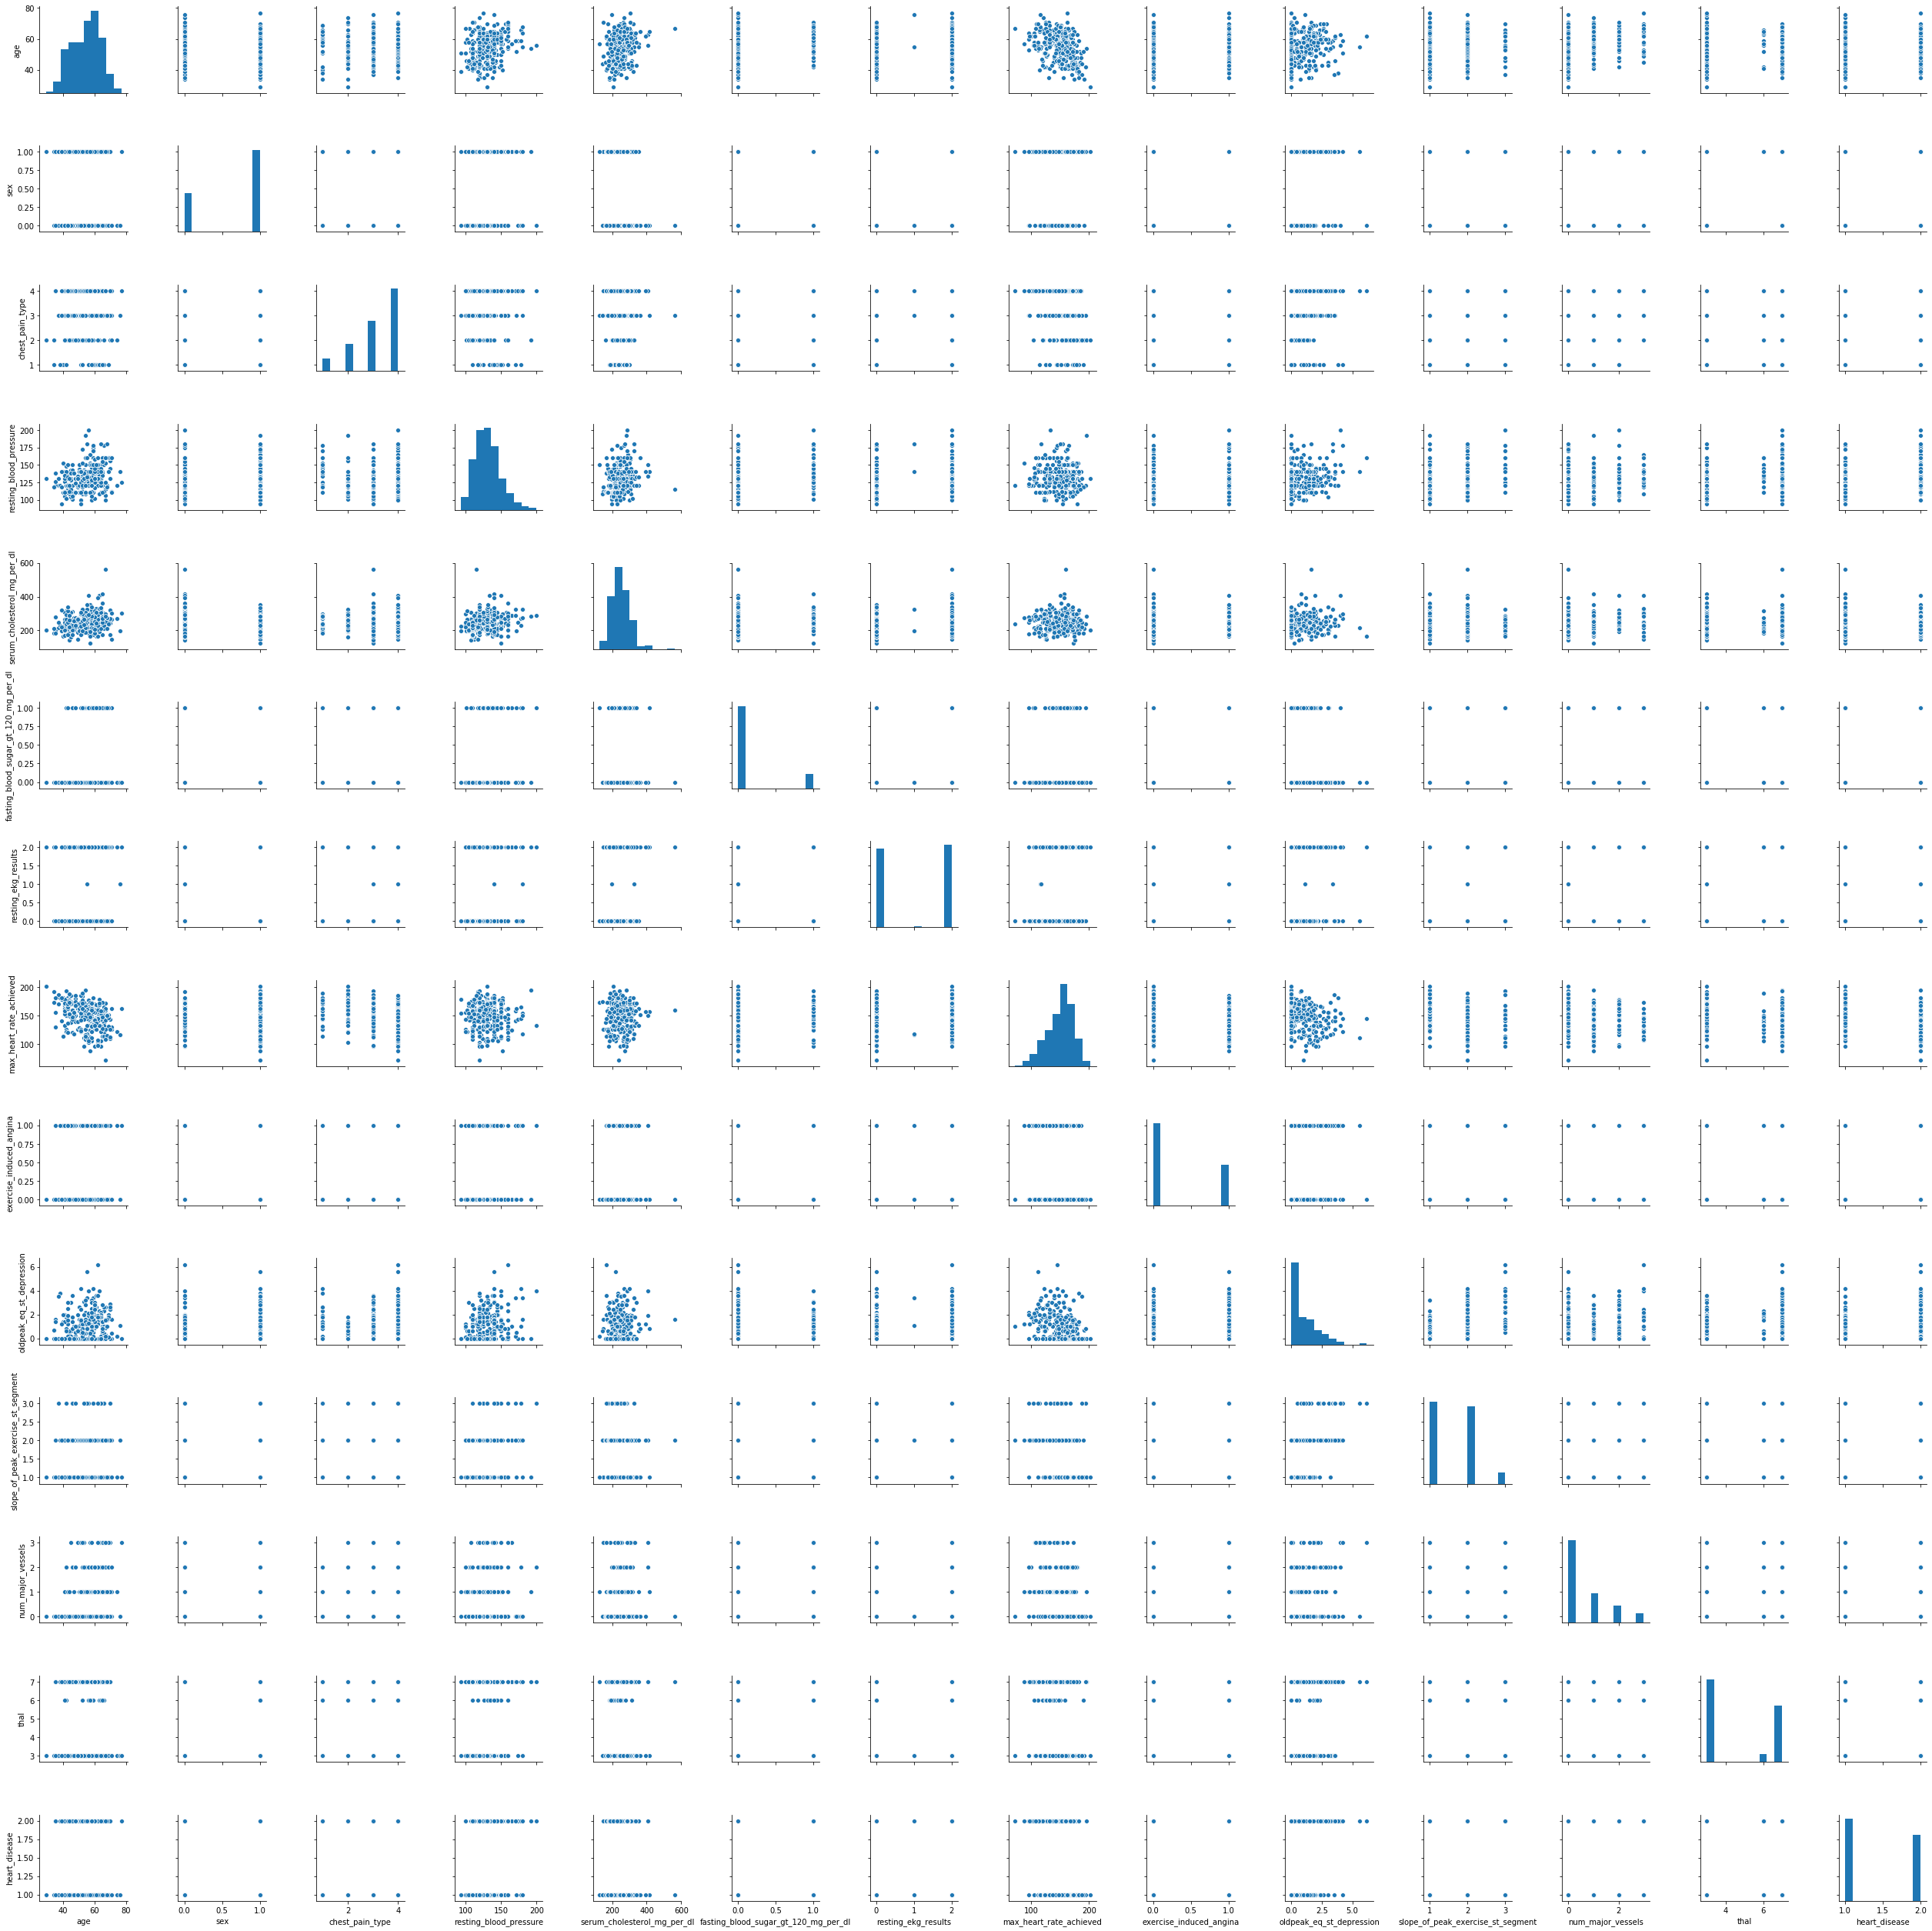

In [13]:
sns.pairplot(df_train)

## 4. Histograms

In [14]:
per_class = [
    df_train[df_train['heart_disease'] == 1],
    df_train[df_train['heart_disease'] == 2]]

target_titles = [
    'No heart disease',
    'Heart disease'
]

df_train['heart_disease_label'] = df_train['heart_disease'].map(dict(zip([1, 2], target_titles)))

### 4.1 Numerical Columns

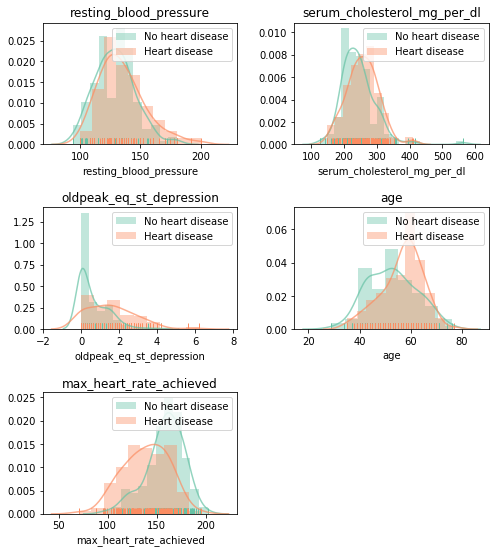

In [15]:
sns.set_palette("Set2")
plt.figure(figsize=(7,10))

for i, c in enumerate(numerical_column_names):
    plt.subplot(4, 2, i+1)
    
    for i in range(2):
        sns.distplot(per_class[i][c], rug=True, hist=True, kde=True, label=target_titles[i], kde_kws=dict(alpha=0.7))

    plt.legend(loc='upper right')
    plt.title(c)
    
plt.tight_layout(pad=1.4, w_pad=1.5, h_pad=1.5)

### 4.2 Categorical Columns

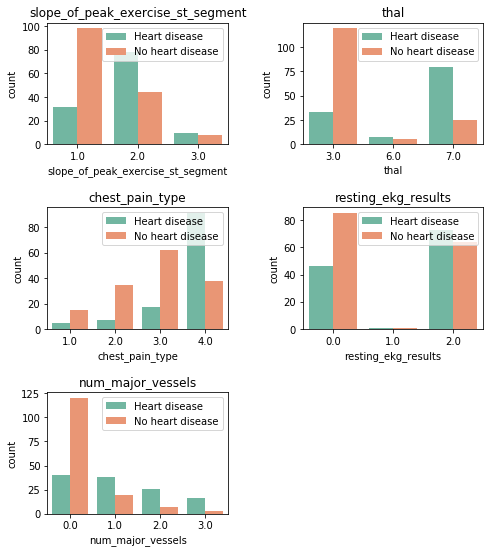

In [16]:
sns.set_palette("Set2")
plt.figure(figsize=(7,10))

for i, c in enumerate(categorical_column_names):
    ax = plt.subplot(4, 2, i+1)
    
    sns.countplot(x=c, hue='heart_disease_label', data=df_train);

    plt.legend(loc='upper right')
    plt.title(c)
    
plt.tight_layout(pad=1.4, w_pad=1.5, h_pad=1.5)

### 4.3 Binary Columns

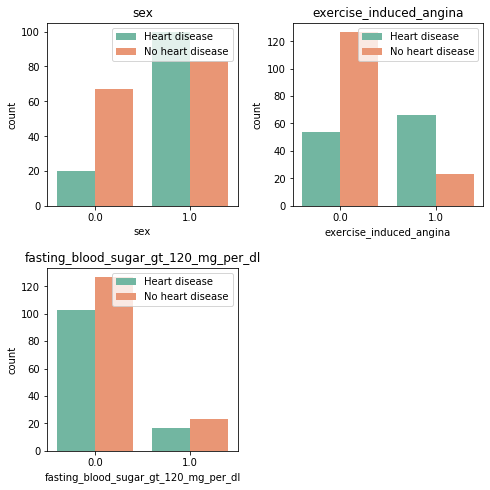

In [17]:
sns.set_palette("Set2")
plt.figure(figsize=(7,7))

for i, c in enumerate(binary_column_names):
    plt.subplot(2, 2, i+1)
    
    sns.countplot(x=c, hue='heart_disease_label', data=df_train);

    plt.legend(loc='upper right')
    plt.title(c)
    
plt.tight_layout(pad=1.4, w_pad=1.5, h_pad=1.5)